png 
  2

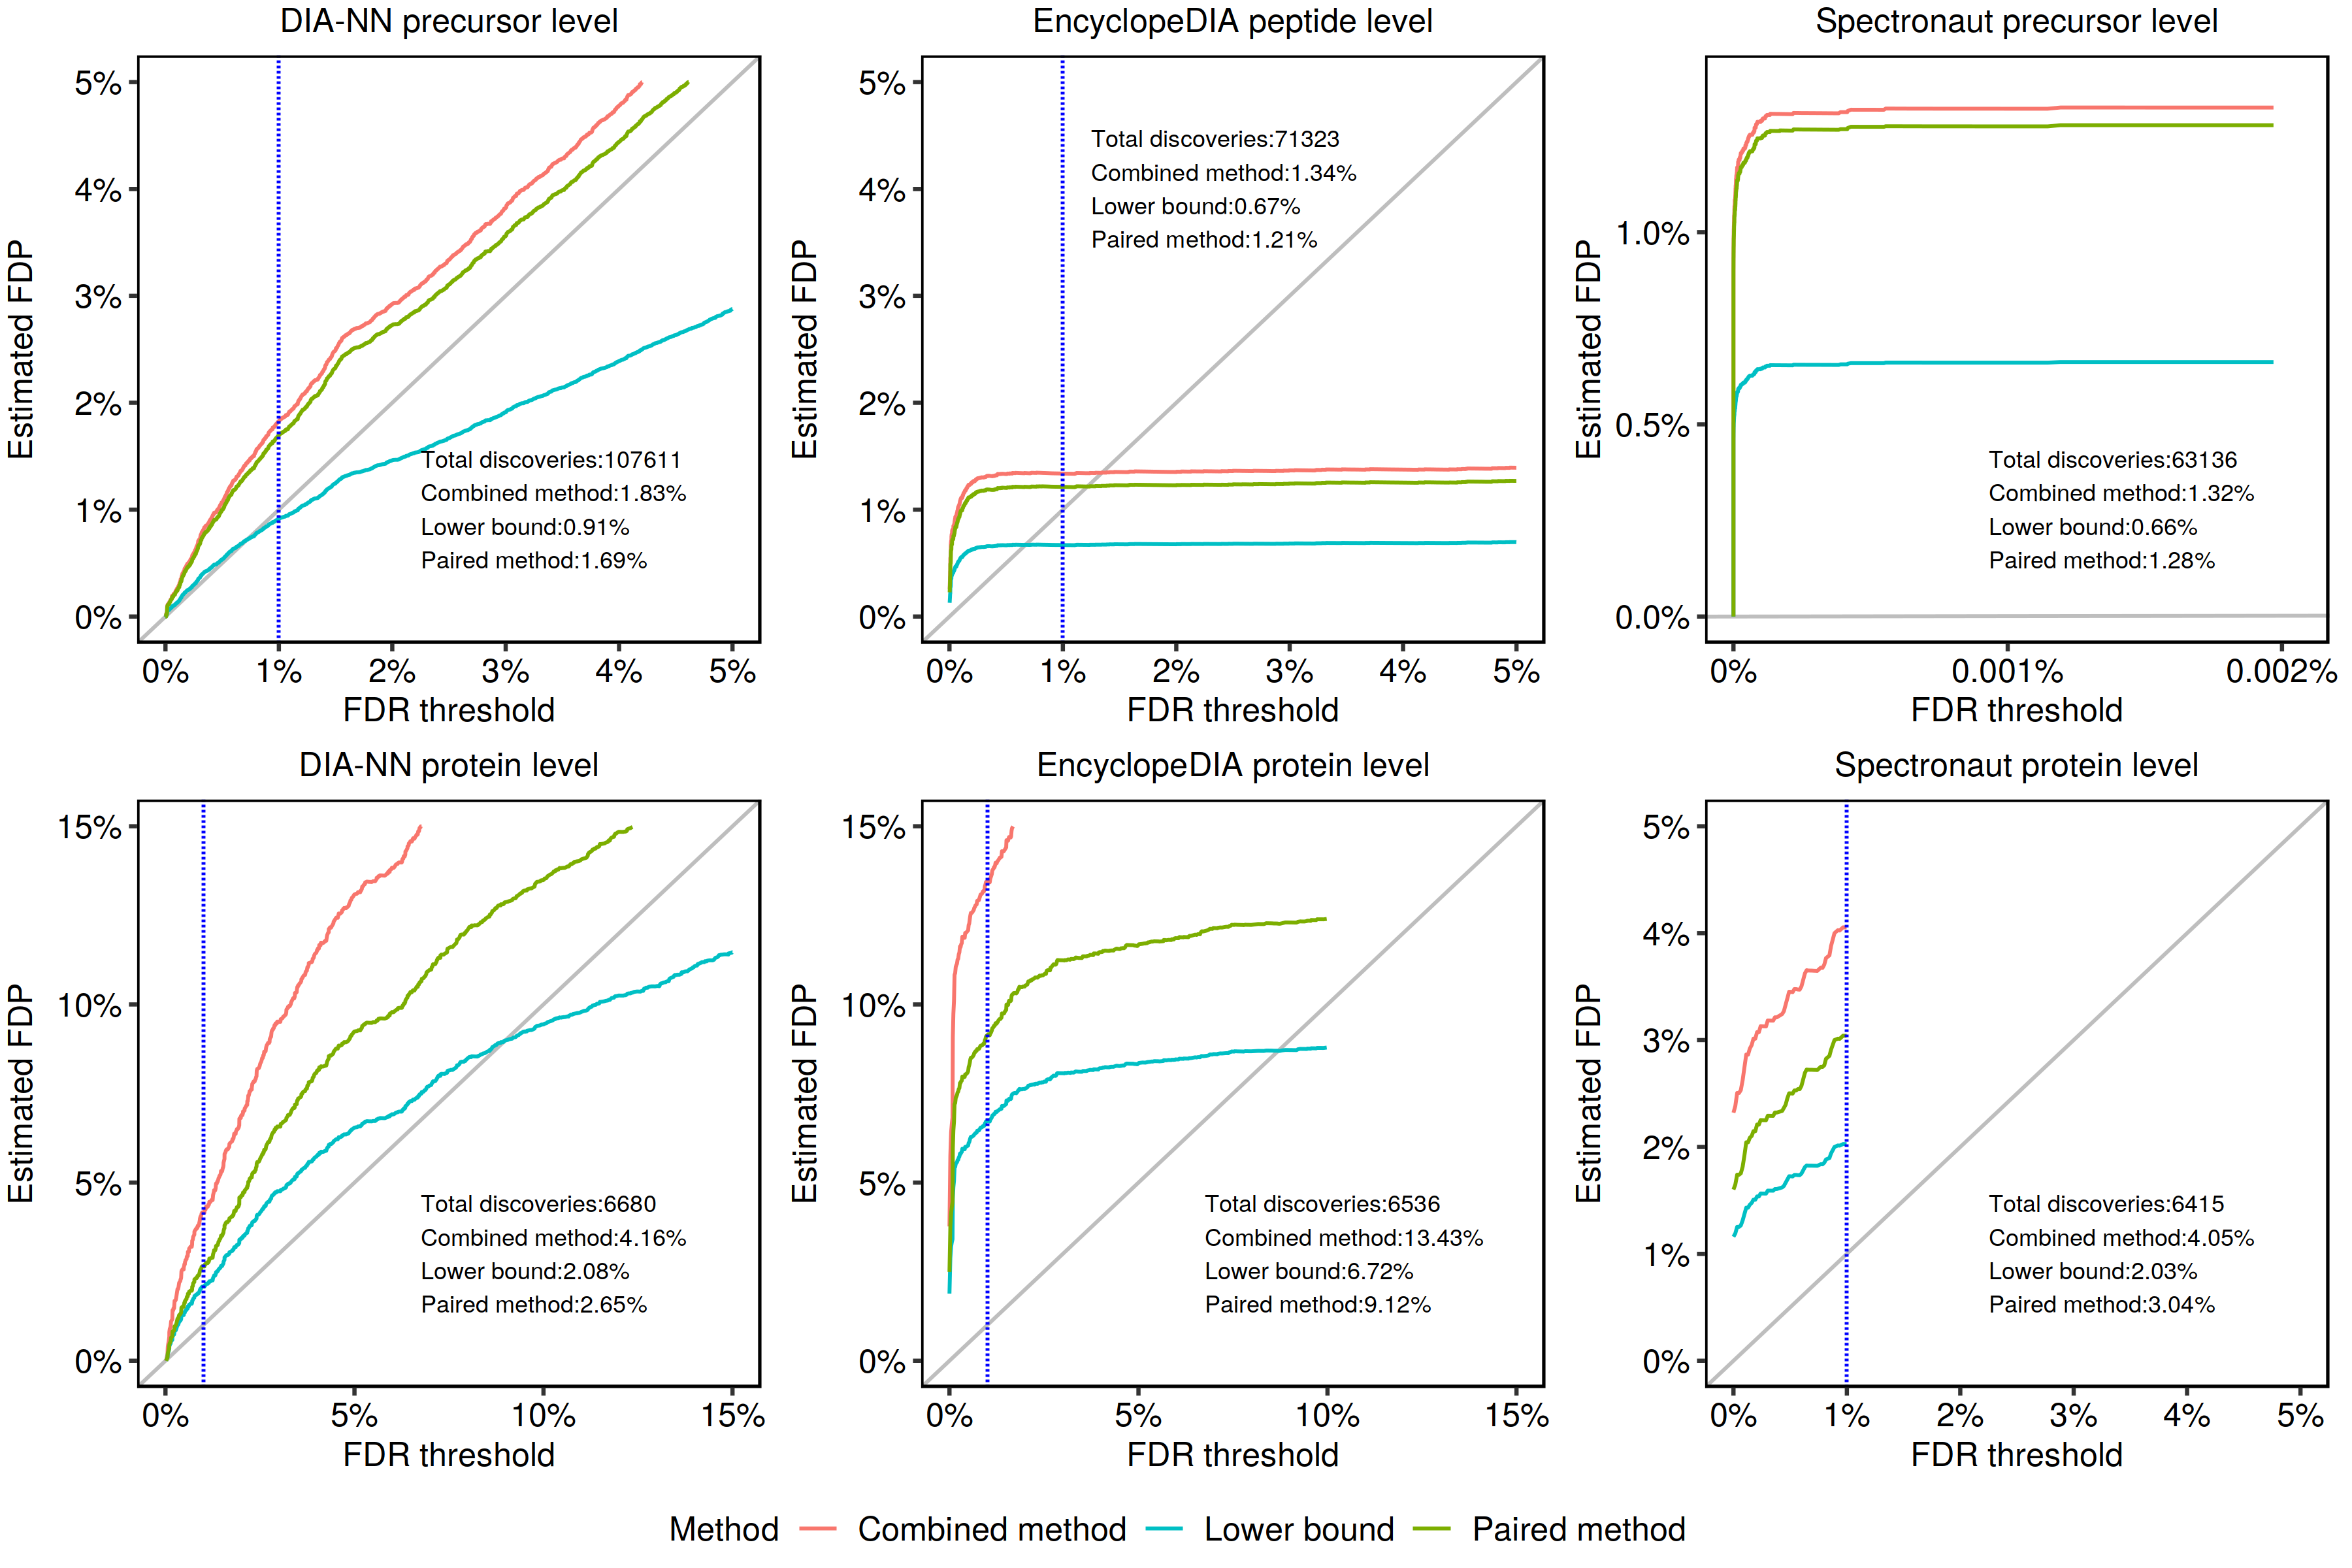

In [2]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4*3, repr.plot.height = 4*2, repr.plot.res = 300)


color_mapping <- c("Paired method" = "#7CAE00", "Sample method" = "#C77CFF", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")


fdr_max <- 0.15
fixed_fdr_max <- FALSE
text_position <- c(fdr_max*0.45,fdr_max*0.2)
fdr_decimal_place <- 2


f1 <- "../diann/PXD034525_Human_AD/protein_level/results/nf-teirex-dia/diann/protein-diann_fdp_protein.csv"
g1 <- plot_fdp_fdr_v2(f1,fdr_max = fdr_max,fig_title="DIA-NN protein level",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)

f2 <- "../encyclopedia/PXD034525_Human_AD/protein_level/results/nf-skyline-dia-ms/encyclopedia/create-elib/protein_step_2-encyclopedia_fdp_protein.csv"
g2 <- plot_fdp_fdr_v2(f2,fdr_max = fdr_max,fig_title="EncyclopeDIA protein level",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)

fdr_max <- 0.05
fixed_fdr_max <- TRUE
text_position <- c(fdr_max*0.45,fdr_max*0.2)
f3 <- "../spectronaut/PXD034525_Human_AD//protein_level/20240512_004324_PXD034525_Human_AD_protein/protein-spectronaut_fdp_protein.csv"
g3 <- plot_fdp_fdr_v2(f3,fdr_max = fdr_max,fig_title="Spectronaut protein level",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)

fdr_max <- 0.05
fixed_fdr_max <- FALSE
text_position <- c(fdr_max*0.45,fdr_max*0.2)
fdr_decimal_place <- 2
f4 <- "../diann/PXD034525_Human_AD/peptide_level_fasta/results/nf-teirex-dia/diann/peptide-diann_fdp_precursor.csv"
g4 <- plot_fdp_fdr_v2(f4,fdr_max = fdr_max,fig_title="DIA-NN precursor level",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)

fdr_max <- 0.05
fixed_fdr_max <- FALSE
text_position <- c(fdr_max*0.25,fdr_max*0.80)
fdr_decimal_place <- 2
f5 <- "../encyclopedia/PXD034525_Human_AD/peptide_level/results/nf-skyline-dia-ms/encyclopedia/create-elib/peptide_step_2-encyclopedia_fdp_peptide.csv"
g5 <- plot_fdp_fdr_v2(f5,fdr_max = fdr_max,fig_title="EncyclopeDIA peptide level",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)


fixed_fdr_max <- FALSE
fdp <- read_csv("../spectronaut/PXD034525_Human_AD/peptide_level/20240528_225215_PXD034525_Human_AD_peptide/peptide-spectronaut_fdp_precursor.csv")
fdr_max <- max(c(fdp$FDP,fdp$FDP_1B))*1.05
max_y <- fdr_max
max_x <- max(fdp$q_value)*1.05
text_position <- c(max_x*0.45,max_y*0.2)
print(text_position)
scale_xy <- TRUE


f6 <- "../spectronaut/PXD034525_Human_AD/peptide_level/20240528_225215_PXD034525_Human_AD_peptide/peptide-spectronaut_fdp_precursor.csv"
g6 <- plot_fdp_fdr_v2(f6,fdr_max = fdr_max,max_x=max_x,max_y=max_y,fig_title="Spectronaut precursor level",scale_xy=scale_xy,add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = fdr_decimal_place,fixed_fdr_max=fixed_fdr_max,text_position=text_position)
g6 <- g6 +scale_x_continuous(breaks = c(0, 0.001/100, 0.002/100), labels = c("0%", "0.001%", "0.002%"),limits =c(0,max_x))

library(ggpubr)
gg <- ggarrange(g4+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                g5+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                g6+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                g1+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                g2+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                g3+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")), 
                ncol = 3, nrow = 2, common.legend = TRUE, legend="bottom",align="hv")
pdf("Figure4.pdf",width = 3.5*3, height = 3.5*2)
print(gg)
dev.off()

print(gg)
